In [12]:
import spacy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout

In [13]:
data_df = pd.read_csv('data-en-hi-de-fr.csv')
data_df.dropna(inplace=True)
data_df.drop_duplicates(inplace=True)
data_df.rename(columns={
    "Category": "labels",
    "Message": "text"
}, inplace=True)

data_df

,labels,text,text_hi,text_de,text_fr
0,ham,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Allez jusqu'à Jurong point, fou.. Disponible s..."
1,ham,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,J'ai fait une blague sur le wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Entrée libre dans 2 a wkly comp pour gagner FA...
3,ham,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,U dun dit si tôt hor... U c déjà dire alors...
4,ham,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","Non, je ne pense pas qu'il va à usf, il vit da..."
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,यह 2 सेकंड है जब हमने 2 संपर्क की कोशिश की है....,"Dies ist das zweite Mal, dass wir versucht hab...",C'est la 2ème fois que nous avons essayé 2 con...
5568,ham,Will ü b going to esplanade fr home?,क्या कलाई घर का पता लगाने के लिए जा रही होगी?,"Wird u b gehen, um esplanade fr home?",Est-ce que ü b ira à l'esplanade en maison?
5569,ham,"Pity, * was in mood for that. So...any other s...","तो फिर, दूसरे सुझाव क्या हैं?","Schade, * war in Stimmung dafür. Also... irgen...","Dommage, * était d'humeur pour ça. Donc... d'a..."
5570,ham,The guy did some bitching but I acted like i'd...,आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और ख...,"Der Typ hat ein bisschen rumgeschnüffelt, aber...",Le type a fait une saloperie mais j'ai agi com...


In [14]:
le = LabelEncoder()
le.fit(data_df.labels)
data_df["labels"] = le.transform(data_df.labels)
data_df

,labels,text,text_hi,text_de,text_fr
0,0,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Allez jusqu'à Jurong point, fou.. Disponible s..."
1,0,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,J'ai fait une blague sur le wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Entrée libre dans 2 a wkly comp pour gagner FA...
3,0,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,U dun dit si tôt hor... U c déjà dire alors...
4,0,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","Non, je ne pense pas qu'il va à usf, il vit da..."
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,यह 2 सेकंड है जब हमने 2 संपर्क की कोशिश की है....,"Dies ist das zweite Mal, dass wir versucht hab...",C'est la 2ème fois que nous avons essayé 2 con...
5568,0,Will ü b going to esplanade fr home?,क्या कलाई घर का पता लगाने के लिए जा रही होगी?,"Wird u b gehen, um esplanade fr home?",Est-ce que ü b ira à l'esplanade en maison?
5569,0,"Pity, * was in mood for that. So...any other s...","तो फिर, दूसरे सुझाव क्या हैं?","Schade, * war in Stimmung dafür. Also... irgen...","Dommage, * était d'humeur pour ça. Donc... d'a..."
5570,0,The guy did some bitching but I acted like i'd...,आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और ख...,"Der Typ hat ein bisschen rumgeschnüffelt, aber...",Le type a fait une saloperie mais j'ai agi com...


In [17]:
# Reset indices after preprocessing to ensure alignment
data_df.reset_index(drop=True, inplace=True)

train_x, test_x, train_y, test_y = train_test_split(data_df.text, data_df.labels, stratify=data_df.labels, test_size=0.3, random_state=123)
train_x_fr, test_x_fr, train_y_fr, test_y_fr = train_test_split(data_df.text_fr, data_df.labels, stratify=data_df.labels, test_size=0.3, random_state=123)
train_x_de, test_x_de, train_y_de, test_y_de = train_test_split(data_df.text_de, data_df.labels, stratify=data_df.labels, test_size=0.3, random_state=123)

In [ ]:
# Load spacy models for French and German
nlp_fr = spacy.load('fr_core_news_sm')
nlp_de = spacy.load('de_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')

In [19]:


def preprocess_text(text, nlp):
    doc = nlp(text.lower().strip())
    return " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_stop and not token.like_num])

data_df['processed_text_en'] = data_df['text'].apply(preprocess_text, nlp=nlp_en)
data_df['processed_text_fr'] = data_df['text_fr'].apply(preprocess_text, nlp=nlp_fr)
data_df['processed_text_de'] = data_df['text_de'].apply(preprocess_text, nlp=nlp_de)

data_df

,labels,text,text_hi,text_de,text_fr,processed_text_en,processed_text_fr,processed_text_de
0,0,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Allez jusqu'à Jurong point, fou.. Disponible s...",jurong point crazy available bugis n great wor...,aller jusque jurong point fou disponible bugis...,Jurong Punkt verrückt verfügbar Buggis n great...
1,0,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,J'ai fait une blague sur le wif u oni...,ok lar joke wif u oni,blague wif u oni,ok lar Joking Wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Entrée libre dans 2 a wkly comp pour gagner FA...,free entry wkly comp win fa cup final tkts tex...,entrée libre wkly comp gagner fa cup final tkt...,frei Eintritt Wkly Comp Gewinn fa cup Final Tk...
3,0,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,U dun dit si tôt hor... U c déjà dire alors...,u dun early hor u c,u dun tôt hor u c,u dun sagen früh u c sagen
4,0,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","Non, je ne pense pas qu'il va à usf, il vit da...",nah think go usf live,non usf voir coin,glauben unsf leben Nähe
...,...,...,...,...,...,...,...,...
5152,1,This is the 2nd time we have tried 2 contact u...,यह 2 सेकंड है जब हमने 2 संपर्क की कोशिश की है....,"Dies ist das zweite Mal, dass wir versucht hab...",C'est la 2ème fois que nous avons essayé 2 con...,time try contact u. u win £ pound prize claim ...,2èm fois essayer contact u. u gagner prix £ po...,Mal versuchen Kontakt u. u gewinnen £ Pound Pr...
5153,0,Will ü b going to esplanade fr home?,क्या कलाई घर का पता लगाने के लिए जा रही होगी?,"Wird u b gehen, um esplanade fr home?",Est-ce que ü b ira à l'esplanade en maison?,ü b go esplanade fr home,-ce ü b aller esplanade maison,u b Esplanade FR home
5154,0,"Pity, * was in mood for that. So...any other s...","तो फिर, दूसरे सुझाव क्या हैं?","Schade, * war in Stimmung dafür. Also... irgen...","Dommage, * était d'humeur pour ça. Donc... d'a...",pity mood suggestion,dommage humeur suggestion,schade Stimmung irgendwelcher Vorschlag
5155,0,The guy did some bitching but I acted like i'd...,आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और ख...,"Der Typ hat ein bisschen rumgeschnüffelt, aber...",Le type a fait une saloperie mais j'ai agi com...,guy bitching act like interested buy week give...,type saloperie agir intéresser acheter chose s...,Typ bisschen rumgeschnüffeln nächster Woche an...


In [9]:
# Tokenizer setup
tokenizer_en = Tokenizer(num_words=5000)
tokenizer_fr = Tokenizer(num_words=5000)
tokenizer_de = Tokenizer(num_words=5000)

# Fit on the processed texts
tokenizer_en.fit_on_texts(data_df['processed_text_en'])
tokenizer_fr.fit_on_texts(data_df['processed_text_fr'])
tokenizer_de.fit_on_texts(data_df['processed_text_de'])

# Convert texts to sequences
sequences_en = tokenizer_en.texts_to_sequences(data_df['processed_text_en'])
sequences_fr = tokenizer_fr.texts_to_sequences(data_df['processed_text_fr'])
sequences_de = tokenizer_de.texts_to_sequences(data_df['processed_text_de'])

# Padding sequences to the same length
max_sequence_len = 150

X_seq_en = pad_sequences(sequences_en, maxlen=max_sequence_len)
X_seq_fr = pad_sequences(sequences_fr, maxlen=max_sequence_len)
X_seq_de = pad_sequences(sequences_de, maxlen=max_sequence_len)

# Splitting the data using the already defined splits

X_train_seq_en = X_seq_fr[train_x.index]
X_test_seq_en = X_seq_fr[test_x.index]

X_train_seq_fr = X_seq_fr[train_x_fr.index]
X_test_seq_fr = X_seq_fr[test_x_fr.index]
X_train_seq_de = X_seq_de[train_x_de.index]
X_test_seq_de = X_seq_de[test_x_de.index]

In [10]:
# Vectorizer for French and German
vectorizer_fr = CountVectorizer(max_features=5000)
vectorizer_de = CountVectorizer(max_features=5000)
vectorizer_en = CountVectorizer(max_features=5000)


# Fit and transform the 
X_vect_en = vectorizer_fr.fit_transform(data_df['processed_text_en'])
X_vect_fr = vectorizer_fr.fit_transform(data_df['processed_text_fr'])
X_vect_de = vectorizer_de.fit_transform(data_df['processed_text_de'])


# Use indices to get train and test sets
X_train_vect_en = X_vect_en[train_x.index]
X_test_vect_en = X_vect_en[test_x.index]

X_train_vect_fr = X_vect_fr[train_x_fr.index]
X_test_vect_fr = X_vect_fr[test_x_fr.index]

X_train_vect_de = X_vect_de[train_x_de.index]
X_test_vect_de = X_vect_de[test_x_de.index]



# Initialize and train Naive Bayes for English
nb_model_en = MultinomialNB()
nb_model_en.fit(X_train_vect_en, train_y)
y_pred_en = nb_model_en.predict(X_test_vect_en)
print("English Naive Bayes Classification Report:")
print(classification_report(test_y, y_pred_en))


# Initialize and train Naive Bayes for French
nb_model_fr = MultinomialNB()
nb_model_fr.fit(X_train_vect_fr, train_y_fr)
y_pred_fr = nb_model_fr.predict(X_test_vect_fr)
print("French Naive Bayes Classification Report:")
print(classification_report(test_y_fr, y_pred_fr))

# Initialize and train Naive Bayes for German
nb_model_de = MultinomialNB()
nb_model_de.fit(X_train_vect_de, train_y_de)
y_pred_de = nb_model_de.predict(X_test_vect_de)
print("German Naive Bayes Classification Report:")
print(classification_report(test_y_de, y_pred_de))

English Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.91      0.91       192

    accuracy                           0.98      1548
   macro avg       0.95      0.95      0.95      1548
weighted avg       0.98      0.98      0.98      1548

French Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1356
           1       0.87      0.89      0.88       192

    accuracy                           0.97      1548
   macro avg       0.93      0.94      0.93      1548
weighted avg       0.97      0.97      0.97      1548

German Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1356
           1       0.89      0.90      0.89       192

    accuracy                           0.97      1548
 

English - Test Accuracy: 0.8120
English - Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      1356
         1.0       0.26      0.28      0.27       192

    accuracy                           0.81      1548
   macro avg       0.58      0.58      0.58      1548
weighted avg       0.82      0.81      0.81      1548



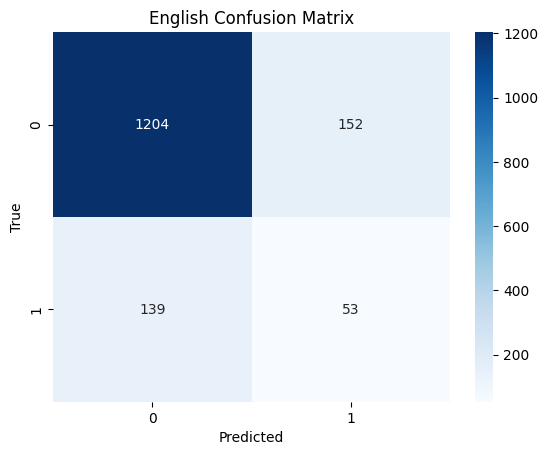

French - Test Accuracy: 0.8398
French - Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      1356
         1.0       0.26      0.16      0.20       192

    accuracy                           0.84      1548
   macro avg       0.58      0.55      0.56      1548
weighted avg       0.81      0.84      0.82      1548



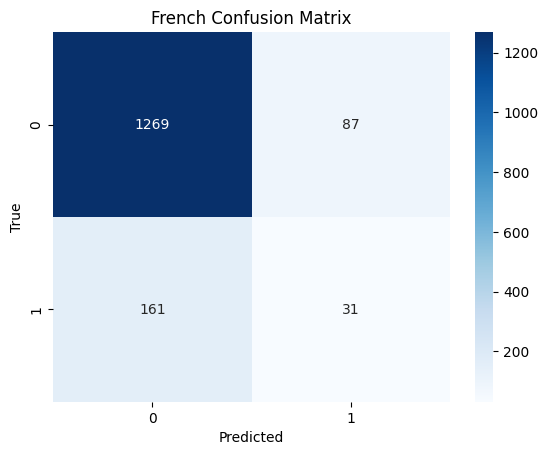

German - Test Accuracy: 0.6789
German - Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.71      0.79      1356
         1.0       0.18      0.46      0.26       192

    accuracy                           0.68      1548
   macro avg       0.54      0.59      0.53      1548
weighted avg       0.81      0.68      0.73      1548



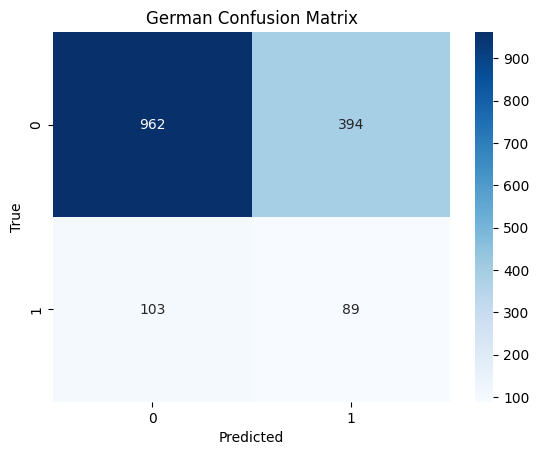

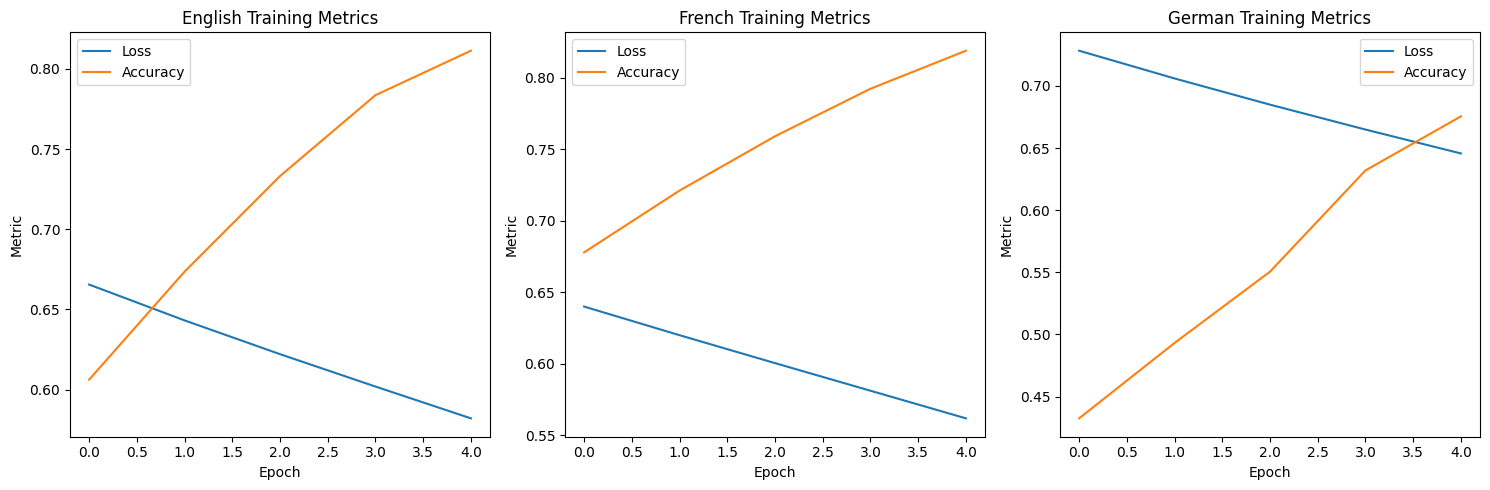

In [25]:
import torch
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check device (CUDA support)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CustomRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers):
        super(CustomRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.embedding = nn.Embedding(input_dim, hidden_dim)
        self.rnn = nn.RNN(hidden_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        embedded = self.embedding(x)
        h0 = torch.zeros(self.n_layers, x.size(0), self.hidden_dim).to(device)
        out, hn = self.rnn(embedded, h0)
        out = self.fc(out[:, -1, :])
        return out

def train_and_evaluate(model, X_train, y_train, X_test, y_test, num_epochs, language):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    X_train, y_train = X_train.to(device), y_train.to(device)
    X_test, y_test = X_test.to(device), y_test.to(device)

    losses = []
    accuracies = []
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs.squeeze(), y_train.float())
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            predictions = torch.sigmoid(outputs).squeeze() > 0.5
            accuracy = (predictions == y_train).float().mean()
            losses.append(loss.item())
            accuracies.append(accuracy.item())
            if epoch == num_epochs - 1:
                test_outputs = model(X_test)
                test_predictions = torch.sigmoid(test_outputs).squeeze() > 0.5
                test_acc = (test_predictions == y_test).float().mean()
                print(f'{language} - Test Accuracy: {test_acc:.4f}')
                print(f'{language} - Classification Report:\n{classification_report(y_test.cpu().numpy(), test_predictions.cpu().numpy())}')
                cm = confusion_matrix(y_test.cpu().numpy(), test_predictions.cpu().numpy())
                plt.figure()
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
                plt.title(f'{language} Confusion Matrix')
                plt.xlabel('Predicted')
                plt.ylabel('True')
                plt.show()
    return losses, accuracies

languages = ['English', 'French', 'German']
data = {
    'English': (torch.tensor(X_train_seq_en.tolist()).long(), torch.tensor(train_y.tolist()).float(), torch.tensor(X_test_seq_en.tolist()).long(), torch.tensor(test_y.tolist()).float()),
    'French': (torch.tensor(X_train_seq_fr.tolist()).long(), torch.tensor(train_y_fr.tolist()).float(), torch.tensor(X_test_seq_fr.tolist()).long(), torch.tensor(test_y_fr.tolist()).float()),
    'German': (torch.tensor(X_train_seq_de.tolist()).long(), torch.tensor(train_y_de.tolist()).float(), torch.tensor(X_test_seq_de.tolist()).long(), torch.tensor(test_y_de.tolist()).float())
}

results = {}
for language, (X_train, y_train, X_test, y_test) in data.items():
    model = CustomRNN(input_dim, hidden_dim, output_dim, n_layers).to(device)
    losses, accuracies = train_and_evaluate(model, X_train, y_train, X_test, y_test, num_epochs, language)
    results[language] = {'Loss': losses, 'Accuracy': accuracies}

# Plot all results together
plt.figure(figsize=(15, 5))
for i, (lang, metrics) in enumerate(results.items()):
    plt.subplot(1, len(languages), i + 1)
    plt.plot(metrics['Loss'], label='Loss')
    plt.plot(metrics['Accuracy'], label='Accuracy')
    plt.title(f'{lang} Training Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend()
plt.tight_layout()
plt.show()


Training LSTM for English...
Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8171 - loss: 0.4499 - val_accuracy: 0.9418 - val_loss: 0.2331
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9461 - loss: 0.1785 - val_accuracy: 0.9668 - val_loss: 0.1592
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9741 - loss: 0.1061 - val_accuracy: 0.9806 - val_loss: 0.0907
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9883 - loss: 0.0516 - val_accuracy: 0.9778 - val_loss: 0.0757
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9933 - loss: 0.0263 - val_accuracy: 0.9834 - val_loss: 0.0628
Evaluating LSTM for English...
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9817 - loss: 0.0671
Test Accuracy for English: 98.19%
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
Classification Report for English:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1     

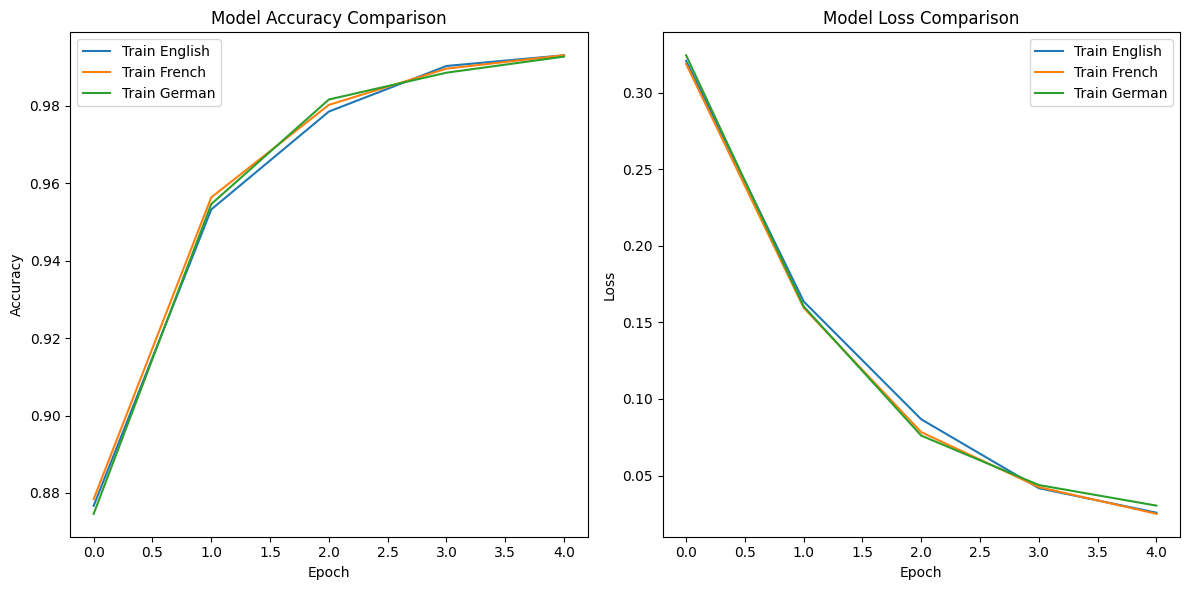

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def build_and_train_lstm(X_train, y_train, X_test, y_test, language, plots):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=64))
    model.add(Dropout(0.2))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    print(f"Training LSTM for {language}...")
    history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)
    
    print(f"Evaluating LSTM for {language}...")
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy for {language}: {accuracy*100:.2f}%")
    
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"Classification Report for {language}:\n{classification_report(y_test, y_pred)}")
    
    # Save plot data in dictionary
    plots[language] = {
        'accuracy': history.history['accuracy'],
        'val_accuracy': history.history['val_accuracy'],
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }

    return model  # Return the trained model

def plot_results(plots):
    plt.figure(figsize=(12, 6))
    
    # Plot accuracy for all languages
    plt.subplot(1, 2, 1)
    for lang, data in plots.items():
        plt.plot(data['accuracy'], label=f'Train {lang}')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    # Plot loss for all languages
    plt.subplot(1, 2, 2)
    for lang, data in plots.items():
        plt.plot(data['loss'], label=f'Train {lang}')
    plt.title('Model Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


plot_data = {}
# Train and evaluate for English
build_and_train_lstm(X_train_seq_en, train_y, X_test_seq_en, test_y, "English", plot_data)

# Train and evaluate for French
build_and_train_lstm(X_train_seq_fr, train_y_fr, X_test_seq_fr, test_y_fr, "French", plot_data)

# Train and evaluate for German
build_and_train_lstm(X_train_seq_de, train_y_de, X_test_seq_de, test_y_de, "German", plot_data)

# Plot all results
plot_results(plot_data)
